# Boba tea shops in Denver Metro area

## 1.Introduction/Business Problem

Boba tea shops are becoming more popular these years. Boba tea originated in Taiwan in the early 1980s. "Boba", "pearl", or "bubble" refers to chewy tapioca balls that are usually served with tea or milk tea. Both come with a variety of flavors. Boba tea shops are unique and hard to find, unlike coffee shops that you can see at almost every corner of the city. Boba tea tends to be very popular in asian communities, so a city like Denver with a large asian population will be a good place to invest in a boba tea shop.

Denver is one of the fastest growing cities in the USA. More people are moving to Denver every year, the realty industry is growing, the airline industry is also growing. So if someone is looking to open a Boba tea shop the Denver Metropolitan Area, where would it be the best area to open it? 

This study will be helpful for not only an entrepreneur who wants to invest in a boba tea shop, but also an individual who is interested in boba tea shop business.

## 2.Data

Firstly, I have to find data set that include city, latitude, longtitude, city populations and extract only cities in Denver Metropolitan Area only. When I say Denver Metropolitan Area only, I mean Denver and the cities around denver with a relatively high population density. In this case, I will refer to "Denver–Aurora–Lakewood, CO Metropolitan Statistical Area" which consists of ten Colorado counties: the City and County of Denver, Arapahoe County, Jefferson County, Adams County, Douglas County, the City and County of Broomfield, Elbert County, Park County, Clear Creek County, and Gilpin County.

- The latitude and longitude data will be found on https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?refine.state=CO.
- For the list of cities in in Denver Metropolitan Area, I will scape it from https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Colorado.
- I download city populations data from https://worldpopulationreview.com/states/cities/colorado and upload it back on my github as following https://github.com/kamirothchild/Coursera_Capstone/blob/main/co_city_pop.csv.

Next, I pull the venue data from Foursquare API trying to get a list of boba tea shops that exist in Denver Metropolitan Area. We will use Latitue and Longtitude of Denver as a center of the map and searching for boba tea shops in radius 40 miles or about 65 kilometers. From this part, we can explore the shops and plot it on the map to see how they locate trough out the areas.

Here is the features we will get:

- venueid
- venuename
- latitude
- longitude
- city
- postalcode
- category_primaryid
- category_primary


Not only venue data, we also can go into venue detail for each boba tea shop to see how they perform via Foursquare API. We pull venue details to see rating, price, and also what are their busy time to determine the best shop hours. We will also use Clustering for this data to see the differences.

Features for boba tea shop detail as following:

- rating
- price
- hours
- hours_popular
- description
- popullarity_score

### Let's get started by importing Colorado zip code data from CSV

In [1]:
import numpy as np
import pandas as pd
print('Libraries imported.')

Libraries imported.


In [2]:
url = 'https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&timezone=America/Denver&lang=en&use_labels_for_header=true&csv_separator=%3B'
usa = pd.read_csv(url, sep = ';') #seperate each column with ;
print ('data loaded!')

data loaded!


In [3]:
usa.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,55795,Willow River,MN,46.317812,-92.84315,-6,1,"46.317812,-92.84315"
1,45388,Yorkshire,OH,40.328535,-84.47938,-5,1,"40.328535,-84.47938"
2,39483,Foxworth,MS,31.218509,-89.90761,-6,1,"31.218509,-89.90761"
3,31503,Waycross,GA,31.205194,-82.37534,-5,1,"31.205194,-82.37534"
4,45833,Delphos,OH,40.841409,-84.34178,-5,1,"40.841409,-84.34178"


In [4]:
colorado = usa[usa['State']=="CO"] #filter only colorado
colorado.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
9,80126,Littleton,CO,39.544549,-104.968080,-7,1,"39.544549,-104.96808"
70,80223,Denver,CO,39.699156,-104.999990,-7,1,"39.699156,-104.99999"
230,80809,Cascade,CO,38.911701,-104.987310,-7,1,"38.911701,-104.98731"
252,80123,Littleton,CO,39.616114,-105.073930,-7,1,"39.616114,-105.07393"
253,80217,Denver,CO,39.738752,-104.408349,-7,1,"39.738752,-104.408349"


In [5]:
colorado.shape #now I have cities in colorado in lat,lng

(680, 8)

### Now, scrape a list of Denver Metropolitian Area from the website
https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Colorado

In [6]:
pip install html-table-parser-python3 #install package to use BeautifulSoup

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#install'


In [7]:
from urllib.request import Request, urlopen

#scrape website
req = Request('https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Colorado', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
webpage

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of cities and towns in Colorado - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X@B2HgpAMMMAAkkwNaAAAABU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_cities_and_towns_in_Colorado","wgTitle":"List of cities and towns in Colorado","wgCurRevisionId":989535294,"wgRevisionId":989535294,"wgArticleId":8322109,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","All articles with dead external li

In [8]:
#get table html
from bs4 import BeautifulSoup  
soup = BeautifulSoup(webpage, 'html.parser')  
results = soup.find_all('table')
results

[<table class="wikitable sortable mw-collapsible">
 <caption><big><b>The 271 Municipalities of the State of Colorado</b></big><br/><br/>
 </caption>
 <tbody><tr>
 <th>Place Name
 </th>
 <th>Municipality
 </th>
 <th>Incorporation Date
 </th>
 <th>Government
 </th>
 <th>County
 </th>
 <th class="unsortable">Map
 </th>
 <th>Pop Rank
 </th>
 <th>2014 Estimate
 </th>
 <th>2010 Census
 </th>
 <th>Change
 </th>
 <th>Pop Density
 </th>
 <th>Land Area
 </th>
 <th>Water Area
 </th>
 <th>Total Area
 </th>
 <th>INCITS
 </th>
 <th>WGS84
 </th></tr>
 <tr>
 <td><a href="/wiki/Aguilar,_Colorado" title="Aguilar, Colorado">Aguilar</a>
 </td>
 <td><a class="external text" href="http://www.aguilarco.us/" rel="nofollow">Town of Aguilar</a>
 </td>
 <td><span data-sort-value="1894-01-10 !">January 10, 1894</span>
 </td>
 <td><a href="#Statutory_town">statutory town</a>
 </td>
 <td><a href="/wiki/Las_Animas_County,_Colorado" title="Las Animas County, Colorado">Las Animas County</a>
 </td>
 <td><a class="exter

In [9]:
#scrape table into columns
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]
J=[]
K=[]
L=[]
M=[]
N=[]
O=[]
P=[]

for row in soup.find_all('tr'):
    cells=row.find_all('td')
    if len(cells)==16:
        A.append(cells[0].text.strip())
        B.append(cells[1].text.strip())
        C.append(cells[2].text.strip())
        D.append(cells[3].text.strip())
        E.append(cells[4].text.strip())
        F.append(cells[5].text.strip())
        G.append(cells[6].text.strip())
        H.append(cells[7].text.strip())
        I.append(cells[8].text.strip())
        J.append(cells[9].text.strip())
        K.append(cells[10].text.strip())
        L.append(cells[11].text.strip())
        M.append(cells[12].text.strip())
        N.append(cells[13].text.strip())
        O.append(cells[14].text.strip())
        P.append(cells[15].text.strip())

In [10]:
#get dataframe denmetro and choose only columns we want
co_city=pd.DataFrame(A,columns=['City'])
co_city['County']=E


co_city.head()

,City,County
0,Aguilar,Las Animas County
1,Akron,Washington County[9]
2,Alamosa,Alamosa County[9]
3,Alma,Park County
4,Antonito,Conejos County


In [11]:
co_city['County'] = co_city['County'].str.replace("[^a-zA-Z#]", " ") #get rid of special charactors and numbers
co_city.head()

,City,County
0,Aguilar,Las Animas County
1,Akron,Washington County
2,Alamosa,Alamosa County
3,Alma,Park County
4,Antonito,Conejos County


In [12]:
co_city['County'].unique()
co_city.shape

(271, 2)

In [13]:
#define county in denver metro
county_den = ['Denver', 'Arapahoe', 'Jefferson', 'Adams', 'Douglas', 'Broomfield', 'Elbert', 'Park', 'Clear Creek', 'Gilpin']

In [14]:
#get data if co_city['County'] has any text in county_den
metro_city = co_city[co_city['County'].str.contains(r'\b(?:{})\b'.format('|'.join(county_den)))] #bc contains can only be used with str so I join str with | and pass to str.contains
metro_city.head(30)

,City,County
3,Alma,Park County
6,Arvada,Jefferson CountyAdams County
9,Aurora,Arapahoe CountyAdams CountyDouglas County
13,Bennett,Adams CountyArapahoe County
16,Black Hawk,Gilpin County
22,Bow Mar,Arapahoe CountyJefferson County
25,Brighton,Adams County Weld County
27,Broomfield,City and County of Broomfield
35,Castle Pines,Douglas County
36,Castle Rock,Douglas County


In [15]:
metro_city.shape

(45, 2)

In [16]:
print('Number of cities in Denver Metropolitian Area: ', metro_city.shape[0])

Number of cities in Denver Metropolitian Area:  45


### Now, filter colorado data set with just cities in Denver Metropolitian Area

In [17]:
denmetro_latlng = colorado[colorado['City'].isin(list(metro_city['City']))]
denmetro_latlng.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
9,80126,Littleton,CO,39.544549,-104.968080,-7,1,"39.544549,-104.96808"
70,80223,Denver,CO,39.699156,-104.999990,-7,1,"39.699156,-104.99999"
252,80123,Littleton,CO,39.616114,-105.073930,-7,1,"39.616114,-105.07393"
253,80217,Denver,CO,39.738752,-104.408349,-7,1,"39.738752,-104.408349"
308,80006,Arvada,CO,39.522014,-105.223945,-7,1,"39.522014,-105.223945"


In [18]:
denmetro_latlng.reset_index(drop=True, inplace=True)
denmetro_latlng.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80126,Littleton,CO,39.544549,-104.968080,-7,1,"39.544549,-104.96808"
1,80223,Denver,CO,39.699156,-104.999990,-7,1,"39.699156,-104.99999"
2,80123,Littleton,CO,39.616114,-105.073930,-7,1,"39.616114,-105.07393"
3,80217,Denver,CO,39.738752,-104.408349,-7,1,"39.738752,-104.408349"
4,80006,Arvada,CO,39.522014,-105.223945,-7,1,"39.522014,-105.223945"


In [19]:
denmetro_latlng.drop(['State','Timezone','Daylight savings time flag'], axis=1) #keep only neccesary columns

,Zip,City,Latitude,Longitude,geopoint
0,80126,Littleton,39.544549,-104.968080,"39.544549,-104.96808"
1,80223,Denver,39.699156,-104.999990,"39.699156,-104.99999"
2,80123,Littleton,39.616114,-105.073930,"39.616114,-105.07393"
3,80217,Denver,39.738752,-104.408349,"39.738752,-104.408349"
4,80006,Arvada,39.522014,-105.223945,"39.522014,-105.223945"
...,...,...,...,...,...
159,80020,Broomfield,39.934040,-105.054540,"39.93404,-105.05454"
160,80257,Denver,39.738752,-104.408349,"39.738752,-104.408349"
161,80044,Aurora,39.738752,-104.408349,"39.738752,-104.408349"
162,80205,Denver,39.758986,-104.966780,"39.758986,-104.96678"


In [20]:
print('Number of Zip code in Denver Metropolitian Area: ', denmetro_latlng.shape[0])

Number of Zip code in Denver Metropolitian Area:  164


In [21]:
denmetro_city = denmetro_latlng.drop_duplicates(subset=['City']) #keep only unique cities

In [22]:
denmetro_city = denmetro_city.reset_index(drop=True)

In [23]:
denmetro_city #now I have denver metro cities with lat,lng

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80126,Littleton,CO,39.544549,-104.968080,-7,1,"39.544549,-104.96808"
1,80223,Denver,CO,39.699156,-104.999990,-7,1,"39.699156,-104.99999"
2,80006,Arvada,CO,39.522014,-105.223945,-7,1,"39.522014,-105.223945"
3,80108,Castle Rock,CO,39.453833,-104.885409,-7,1,"39.453833,-104.885409"
4,80139,Parker,CO,39.514740,-104.744145,-7,1,"39.51474,-104.744145"
5,80018,Aurora,CO,39.689244,-104.716600,-7,1,"39.689244,-104.7166"
6,80030,Westminster,CO,39.830936,-105.037360,-7,1,"39.830936,-105.03736"
7,80155,Englewood,CO,39.738752,-104.408349,-7,1,"39.738752,-104.408349"
8,80452,Idaho Springs,CO,39.737369,-105.560540,-7,1,"39.737369,-105.56054"
9,80402,Golden,CO,39.522014,-105.223945,-7,1,"39.522014,-105.223945"


In [24]:
print('Number of cities in Denver Metropolitian Area with Latitude and Longtitude', denmetro_city.shape[0])

Number of cities in Denver Metropolitian Area with Latitude and Longtitude 30


### Denver and Metropolitian map

In [27]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [30]:
import folium 
from geopy.geocoders import Nominatim 

import matplotlib.cm as cm
import matplotlib.colors as colors
print('imported')

imported


In [31]:
#get Denver latitude and longitude
address = 'Denver'

geolocator = Nominatim(user_agent="denver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Denver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Denver are 39.7392364, -104.9848623.


In [32]:
# create map of Denver using latitude and longitude values
map_den = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(denmetro_city['Latitude'], denmetro_city['Longitude'], denmetro_city['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='coral',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_den)  
    
map_den

### City Populations in Denver Metropolitan Area

I found a population file available on https://worldpopulationreview.com/states/cities/colorado. However, I have a hard time directly pulling or scraping the data from the website. So, I decide to use a simple method by downloading the data and uploading it back on my Githup.

In [33]:
url = 'https://github.com/kamirothchild/Coursera_Capstone/blob/main/co_city_pop.csv?raw=true'
co_pop = pd.read_csv(url)
co_pop.head()

,rank,name,pop2020,pop2010,change,density
0,1,Denver,734134,603354,0.2168,1849.0876
1,2,Colorado Springs,485946,420544,0.1555,962.1798
2,3,Aurora,382742,326073,0.1738,957.9039
3,4,Fort Collins,172862,145267,0.1900,1167.1821
4,5,Lakewood,158660,142786,0.1112,1423.0873


In [34]:
co_pop = co_pop.drop(['pop2010','change','rank'], axis=1)

In [35]:
co_pop.rename(columns = {"name": "City"},  inplace = True) #density per km^2
co_pop.head(20)

,City,pop2020,density
0,Denver,734134,1849.0876
1,Colorado Springs,485946,962.1798
2,Aurora,382742,957.9039
3,Fort Collins,172862,1167.1821
4,Lakewood,158660,1423.0873
5,Thornton,143890,1547.9067
6,Arvada,123036,1224.8238
7,Westminster,113919,1392.5473
8,Pueblo,113662,798.4798
9,Centennial,112151,1463.9517


### Boba tea shops in Denver Metropolitan Area from Foursquare

In [36]:
CLIENT_ID = 'D1H4FH12E30Y1JILNCVUWKCE4K1VECBQQS3NXJWVG22EVQ2N' 
CLIENT_SECRET = 'S2BSNE2WKOUGLJH2RACEXC15KTV4JNMZ0JUDHM3JYJ3PPAXA' 
ACCESS_TOKEN = 'DEXTWJB112PSMWQA41OG5HS1DROGB05AIWSDWQDNY5YDVXPG'
VERSION = '20180605' 
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D1H4FH12E30Y1JILNCVUWKCE4K1VECBQQS3NXJWVG22EVQ2N
CLIENT_SECRET:S2BSNE2WKOUGLJH2RACEXC15KTV4JNMZ0JUDHM3JYJ3PPAXA


### We are looking for only Boba tea shops which Foursqare calls them 'Bubble Tea Shop'.
Category ID can be found from https://developer.foursquare.com/docs/build-with-foursquare/categories/.

In [37]:
LIMIT = 100
radius = 65000
categoryId = '52e81612bcbc57f1066b7a0c' #boba tea category
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius,
    categoryId,
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=D1H4FH12E30Y1JILNCVUWKCE4K1VECBQQS3NXJWVG22EVQ2N&client_secret=S2BSNE2WKOUGLJH2RACEXC15KTV4JNMZ0JUDHM3JYJ3PPAXA&v=20180605&ll=39.7392364,-104.9848623&radius=65000&categoryId=52e81612bcbc57f1066b7a0c&limit=100'

In [38]:
import requests

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fe0ed6ce73c1a674a50cd36'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Denver',
  'headerFullLocation': 'Denver',
  'headerLocationGranularity': 'city',
  'query': 'bubble tea',
  'totalResults': 35,
  'suggestedBounds': {'ne': {'lat': 40.32423698500059,
    'lng': -104.22551611028805},
   'sw': {'lat': 39.15423581499942, 'lng': -105.74420848971195}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '59593fd4029a55239dca639d',
       'name': 'Kung Fu Tea',
       'location': {'address': '6365 E Hampden Ave #102',
        'lat': 39.6539828,
        'lng': -104.9159009,
        'labeledLatLngs': [{'label': 'display',
          'lat': 39.6539828

In [40]:
#function that extracts just category name from venue.categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues.head()

<ipython-input-41-86bbce37f461>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.photos.count,venue.photos.groups,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.location.crossStreet,venue.location.neighborhood
0,e-0-59593fd4029a55239dca639d-0,0,"[{'summary': 'This spot is popular', 'type': '...",59593fd4029a55239dca639d,Kung Fu Tea,6365 E Hampden Ave #102,39.653983,-104.915901,"[{'label': 'display', 'lat': 39.6539828, 'lng'...",11178,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e-0-520ad81e498ef116e3fb784d-1,0,"[{'summary': 'This spot is popular', 'type': '...",520ad81e498ef116e3fb784d,Pho Saigon Basil,7057 W Alaska Dr,39.709215,-105.074785,"[{'label': 'display', 'lat': 39.70921479611191...",8393,...,0,[],2177822,https://www.grubhub.com/restaurant/pho-saigon-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
2,e-0-5a78d07d6fd6264671d65809-2,0,"[{'summary': 'This spot is popular', 'type': '...",5a78d07d6fd6264671d65809,Kung Fu Tea,1121 Broadway Ste 102,40.007786,-105.275285,"[{'label': 'display', 'lat': 40.007786, 'lng':...",38849,...,0,[],2122308,https://www.grubhub.com/restaurant/kung-fu-tea...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
3,e-0-4ab00cebf964a520a86520e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4ab00cebf964a520a86520e3,Ku Cha House of Tea,1141 Pearl St,40.017957,-105.279831,"[{'label': 'display', 'lat': 40.017957, 'lng':...",39970,...,0,[],NaN,NaN,NaN,NaN,NaN,NaN,at Pearl St.,NaN
4,e-0-5f73cad76ded810bb54da299-4,0,"[{'summary': 'This spot is popular', 'type': '...",5f73cad76ded810bb54da299,Colorado Tea Station,1700 Platte St # 130,39.758241,-105.006362,"[{'label': 'display', 'lat': 39.758241, 'lng':...",2803,...,0,[],2448198,https://www.grubhub.com/restaurant/tea-station...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN


In [42]:
# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.city']
nearby_venues =nearby_venues.filter(filtered_columns)
nearby_venues.head()

,venue.id,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.city
0,59593fd4029a55239dca639d,Kung Fu Tea,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",39.653983,-104.915901,Denver
1,520ad81e498ef116e3fb784d,Pho Saigon Basil,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",39.709215,-105.074785,Lakewood
2,5a78d07d6fd6264671d65809,Kung Fu Tea,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",40.007786,-105.275285,Boulder
3,4ab00cebf964a520a86520e3,Ku Cha House of Tea,"[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",40.017957,-105.279831,Boulder
4,5f73cad76ded810bb54da299,Colorado Tea Station,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",39.758241,-105.006362,Denver


In [43]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,id,name,categories,lat,lng,city
0,59593fd4029a55239dca639d,Kung Fu Tea,Bubble Tea Shop,39.653983,-104.915901,Denver
1,520ad81e498ef116e3fb784d,Pho Saigon Basil,Vietnamese Restaurant,39.709215,-105.074785,Lakewood
2,5a78d07d6fd6264671d65809,Kung Fu Tea,Bubble Tea Shop,40.007786,-105.275285,Boulder
3,4ab00cebf964a520a86520e3,Ku Cha House of Tea,Tea Room,40.017957,-105.279831,Boulder
4,5f73cad76ded810bb54da299,Colorado Tea Station,Bubble Tea Shop,39.758241,-105.006362,Denver


In [44]:
print('There are ', nearby_venues.shape[0] , ' boba tea shops in Denver Metropolitian Area')

There are  35  boba tea shops in Denver Metropolitian Area


### Now let's plot the map of boba tea shops

In [45]:
# create map of boba tea shops in Denver using latitude and longitude values
map_boba = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='#bc473a',
        fill=True,
        fill_color='#bc473a',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boba)  
    
map_boba

From the map, I can see boba tea shops mostly locate in South and North area of Denver

### Grouping boba tea shops by city

In [46]:
boba_by_city = nearby_venues.groupby('city').count().reset_index()
boba_by_city.drop(['categories','lat','lng'], axis=1, inplace=True)
boba_by_city.rename(columns = {"name": "Number of boba tea shops"},  inplace = True)
boba_by_city.rename(columns = {"city": "City"},  inplace = True)
sorted_bobabycity = boba_by_city.sort_values(by='Number of boba tea shops', ascending=False).reset_index(drop=True)
sorted_bobabycity

,City,id,Number of boba tea shops
0,Denver,10,10
1,Aurora,4,4
2,Lakewood,4,4
3,Broomfield,3,3
4,Boulder,2,2
5,Littleton,2,2
6,Westminster,2,2
7,Centennial,1,1
8,Greenwood Village,1,1
9,Highlands Ranch,1,1


### Let's plot Bar Chart

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid") #use whitegrid as the plot background

Matplotlib is building the font cache; this may take a moment.


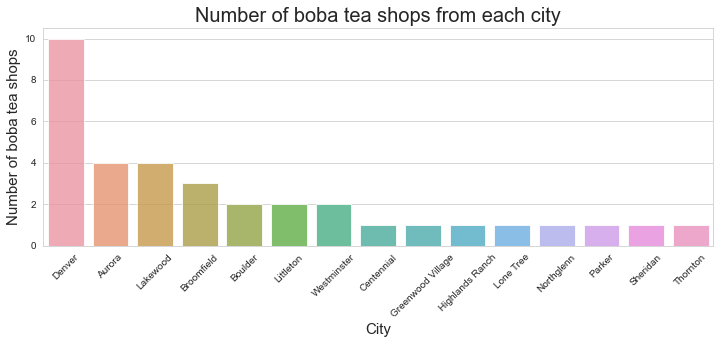

In [48]:
plt.figure(figsize = (12,4))
barplot = sns.barplot(x = "City", y = "Number of boba tea shops", data = sorted_bobabycity, alpha=0.8)
plt.title("Number of boba tea shops from each city", fontsize = 20)
plt.xlabel("City", fontsize = 15)
plt.ylabel("Number of boba tea shops", fontsize = 15)
plt.xticks(rotation=45)
plt.show()

From here, it is obvious that Denver has the most boba tea shops in Denver metro area. My guess is that Denver is a downtown area where people go for entertainment and shopping.

### The City Populations and the Number of Boba Tea Shops

In [49]:
den_boba=co_pop.merge(sorted_bobabycity, on='City', how='outer')
den_boba.head()

,City,pop2020,density,id,Number of boba tea shops
0,Denver,734134,1849.0876,10.0,10.0
1,Colorado Springs,485946,962.1798,NaN,NaN
2,Aurora,382742,957.9039,4.0,4.0
3,Fort Collins,172862,1167.1821,NaN,NaN
4,Lakewood,158660,1423.0873,4.0,4.0


In [50]:
den_boba['Number of boba tea shops'] = den_boba['Number of boba tea shops'].fillna(0) #replace NaN with 0
den_boba['Number of boba tea shops'] = den_boba['Number of boba tea shops'].astype("int")

In [51]:
den_boba = den_boba.sort_values(by=['Number of boba tea shops','density'], ascending=False).reset_index(drop=True) #sorted by boba tea shop and density
den_boba.head()

,City,pop2020,density,id,Number of boba tea shops
0,Denver,734134,1849.0876,10.0,10
1,Lakewood,158660,1423.0873,4.0,4
2,Aurora,382742,957.9039,4.0,4
3,Broomfield,72783,851.4743,3.0,3
4,Boulder,106567,1564.9179,2.0,2


C:\Users\kamso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kamso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


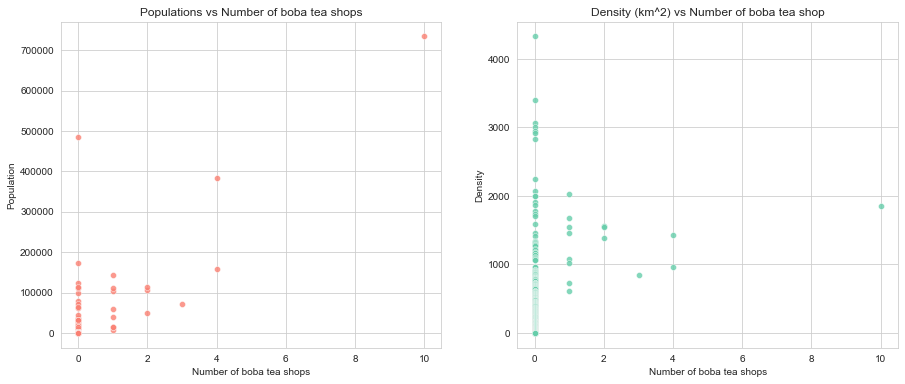

In [52]:
import seaborn as sns
plt.figure(figsize=(15, 6))

y1=den_boba["pop2020"]
x1=den_boba["Number of boba tea shops"]

y2=den_boba["density"]
x2=den_boba["Number of boba tea shops"]

plt.subplot(1, 2, 1)
sns.scatterplot(x1,y1, color='salmon', alpha =0.8)
plt.title("Populations vs Number of boba tea shops")
plt.ylabel("Population")

plt.subplot(1, 2, 2)
sns.scatterplot(x2,y2, color='mediumaquamarine', alpha =0.8)
plt.title("Density (km^2) vs Number of boba tea shop")
plt.ylabel("Density")

plt.show()

In [53]:
from scipy import stats
den_boba.corr() #get correlation

,pop2020,density,id,Number of boba tea shops
pop2020,1.000000,0.280791,0.930608,0.787582
density,0.280791,1.000000,0.262363,0.227745
id,0.930608,0.262363,1.000000,1.000000
Number of boba tea shops,0.787582,0.227745,1.000000,1.000000


there is positive relationship between population number and number of boba tea shop

### Boba Tea Shops in Detail

In [54]:
venue_id_list = nearby_venues['id'].tolist()
venue_id_list

['59593fd4029a55239dca639d',
 '520ad81e498ef116e3fb784d',
 '5a78d07d6fd6264671d65809',
 '4ab00cebf964a520a86520e3',
 '5f73cad76ded810bb54da299',
 '5fb33314b2af446ec369f512',
 '5929e4c69deb7d7d290d9fa0',
 '5d4647634d90c90008984c0f',
 '556e4ccf498e8a0e49794711',
 '5bba8af3e65d0c0039922ff9',
 '5b284d98237dee0039d0014e',
 '5c0822b39411f2002c046859',
 '5c0486581fa763002c54c5c7',
 '5be607a278782c002c739c45',
 '53fcbebc498ea15f71dc2c08',
 '5f0ba6ec6106cd3252b57674',
 '5c02fa3dba57b4002c2399eb',
 '5bdf762d6f0aa2002c35a8e1',
 '5f38743d2bd4ed3e83ac7a46',
 '5a21fac41de76502271ba5a1',
 '5bb3ce513ba767002c473645',
 '5d4f2e742d5e6d000862adc4',
 '584aa89f58c4d16a46dd4b88',
 '5cd60c7b58002c002c82507c',
 '5a51648d75eee46709d0df95',
 '5ee702a3e3745c0007c69747',
 '5cf9b7bb7564f7002c6e4e63',
 '5823d375a130da5121dd72f7',
 '55b9c12c498e909071d6595f',
 '5ca287bce47b46002cc6b8cd',
 '5c391a386eda02002cd27e2a',
 '5bd4a01275eee4002c30197a',
 '5cec3bbb3731ee002c987adc',
 '4b7c42d3f964a52015882fe3',
 '5fd2beeb250d

#get Venue Details from forsquareAPI
venue_id = "59593fd4029a55239dca639d"

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
url

results_detail = requests.get(url).json()
results_detail

In [55]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

detail = json_normalize(results_detail) # flatten JSON
detail.columns

#filtered_columns = ['response.venue.id',
                    'response.venue.name',
                    'response.venue.location.city',
                    'response.venue.likes.count','response.venue.rating',
                    'response.venue.description',
                    'response.venue.hours.timeframes',
                    'response.venue.popular.timeframes']
#detail_df =detail.filter(filtered_columns)
#detail_df.head()

In [56]:
#detail_df.columns = [col.split(".")[-1] for col in detail_df.columns] #clean column names
#detail_df

In [57]:
shop_detail=pd.DataFrame()
for i in range(len(venue_id_list)):
    venue_id = venue_id_list[i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    results_detail = requests.get(url).json()
    detail = json_normalize(results_detail)
    shop_detail=shop_detail.append(detail)
    
else:
    print("done")

<ipython-input-57-4c556e03c9f0>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  detail = json_normalize(results_detail)


done


In [58]:
shop_detail

,notifications,meta.code,meta.requestId,response.venue.id,response.venue.name,response.venue.contact.phone,response.venue.contact.formattedPhone,response.venue.contact.facebook,response.venue.contact.facebookName,response.venue.location.address,...,response.venue.hierarchy,response.venue.contact.instagram,response.venue.location.neighborhood,response.venue.hasMenu,response.venue.menu.type,response.venue.menu.label,response.venue.menu.anchor,response.venue.menu.url,response.venue.menu.mobileUrl,response.venue.menu.externalUrl
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed77ee40976c118ba189,59593fd4029a55239dca639d,Kung Fu Tea,7203708888,(720) 370-8888,1964236510372177,Kung Fu Tea,6365 E Hampden Ave #102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed78ba6fa474b8b16a00,520ad81e498ef116e3fb784d,Pho Saigon Basil,3039226100,(303) 922-6100,NaN,NaN,7057 W Alaska Dr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed7867c4b00207725aea,5a78d07d6fd6264671d65809,Kung Fu Tea,7206383470,(720) 638-3470,112456706110321,Kung Fu Tea,1121 Broadway Ste 102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed78f849016e7106b43b,4ab00cebf964a520a86520e3,Ku Cha House of Tea,3034433612,(303) 443-3612,NaN,NaN,1141 Pearl St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed79f26a27360042c109,5f73cad76ded810bb54da299,Colorado Tea Station,3032000724,(303) 200-0724,106917874320507,Tea Station Colorado,1700 Platte St # 130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed79732a472e701afdbe,5fb33314b2af446ec369f512,Boba Chic,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed7a6ef73c60c6900459,5929e4c69deb7d7d290d9fa0,Bambū,NaN,NaN,NaN,NaN,1149 S Federal Blvd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed7a6ef73c60c69005f2,5d4647634d90c90008984c0f,Dingtea,NaN,NaN,NaN,NaN,1699 S Colorado Blvd Unit E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed7bd3e79e09bc8e49da,556e4ccf498e8a0e49794711,Tea Story Boba Milk Tea,3037778388,(303) 777-8388,NaN,NaN,2022 S University Blvd,...,"[{'name': 'Jason's Thai', 'lang': 'US', 'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'type': 'notificationTray', 'item': {'unread...",200,5fe0ed7be763db0b99f6ea7a,5bba8af3e65d0c0039922ff9,Beau Tea,NaN,NaN,NaN,NaN,723 Quebec St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
    filtered_columns = ['response.venue.id',
                    'response.venue.name',
                    'response.venue.location.city',
                    'response.venue.likes.count','response.venue.rating',
                    'response.venue.description',
                    'response.venue.hours.timeframes',
                    'response.venue.popular.timeframes']
    detail_df =shop_detail.filter(filtered_columns)

In [1]:
detail_df

NameError: name 'detail_df' is not defined